In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
conn = sqlite3.connect('database.db')

In [3]:
c = conn.cursor()

## Desain Database Datawarehouse
<img src="desaindatabase.png">

In [4]:
c.executescript('drop table if exists kota')
c.executescript('drop table if exists pelanggan')
c.executescript('drop table if exists produk')
c.executescript('drop table if exists sales')
c.executescript('drop table if exists penjualan')
c.execute("CREATE TABLE IF NOT EXISTS 'kota' ('id' INT, 'nama_kota' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'pelanggan' ('id' INT, 'nama_depan' VARCHAR(255) NULL, 'nama_belakang' VARCHAR(255) NULL,'email' VARCHAR(255) NULL, 'kota_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('kota_id') REFERENCES 'kota' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'produk' ( 'id' INT, 'SKU' VARCHAR(255) NULL, 'nama_produk' VARCHAR(255) NULL, 'harga' FLOAT NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'sales' ('id' INT, 'kode_sales' VARCHAR(255) NULL, 'nama_depan' VARCHAR(255) NULL, 'nama_belakang' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'penjualan' ( 'id', 'tanggal_penjualan' DATE NULL, 'jumlah_beli' INT NULL, 'pelanggan_id' INT NOT NULL, 'sales_id' INT NOT NULL, 'produk_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('pelanggan_id') REFERENCES 'pelanggan' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('sales_id') REFERENCES 'sales' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('produk_id') REFERENCES 'produk' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [5]:
df = pd.read_csv("Penjualan Kopi Khisoft Coffee - Khisoft Coffee 2016-2018.csv")
df

Nama Depan Nama Belakang                    Email        Kota  \
0       Bambang         Satya         Satya@gmailx.com       Bogor   
1       Rachmat            P.      Rachmat@icloudx.com      Banjar   
2           Lie         Arsil           LIE@ymailx.com   Gorontalo   
3         Jimmy       Hardono       Hardono@ymailx.com  Purwokerto   
4       Sudjono       Hirawan  Hirawan@rocketmailx.com    Pasuruan   
...         ...           ...                      ...         ...   
1042    Hendrik          Hari       Hendrik@ymailx.com     Sibolga   
1043   Antonius        Azhari        Azhari@ymailx.com  Banda Aceh   
1044       Alan      Tioniwar       Tioniwar@livex.com   Samarinda   
1045       Leda         Indra    Indra@rocketmailx.com     Ternate   
1046     Sujono      Franklin    Franklin@outlookx.com     Cilegon   

     Tanggal Pembelian Produk Yang Dibeli Total Penjualan  Nomor Penjualan  \
0           28-12-2018           KP0425CB   Rp136,250,000            36897   
1           28-12-2018           KP0925SG    Rp45,000,000            35624   
2           26-12-2018           KP0850FB   Rp147,000,000            35745   
3           25-12-2018           KP0750AJ   Rp162,000,000            35432   
4           24-12-2018           KP0925SG   Rp105,000,000            35012   
...                ...                ...             ...              ...   
1042        28-08-2018           KP0625AF    Rp48,000,000            37094   
1043        28-08-2018           KP0850FB   Rp189,000,000            37095   
1044        28-08-2018           KP0350CF    Rp70,000,000            37096   
1045        28-09-2018           KP0625AF    Rp48,000,000            37097   
1046        28-09-2018           KP0625AF   Rp120,000,000            37098   

      Jumlah Pembelian  Rating  ... Customer Baru Sales Person Sales  \
0                    5     NaN  ...             Y       Ll-409   409   
1                    3     NaN  ...             N       Do-409   409   
2                    7     NaN  ...             Y       Bc-983   983   
3                    9     NaN  ...             Y       Ng-410   410   
4                    7     NaN  ...             N       Ae-123   123   
...                ...     ...  ...           ...          ...   ...   
1042                 4     NaN  ...             Y       rm-662   662   
1043                 9     5.0  ...             Y       Ok-101   101   
1044                 2     4.0  ...             Y       Ps-993   993   
1045                 4     4.0  ...             Y       Lx-160   160   
1046                10     NaN  ...             N       Up-500   500   

      Kode Sales  Nama Depan.1 Nama Belakang.1    #       SKU  \
0          409.0         Husni          Kawano  1.0  KP0050AG   
1          983.0        Vidhya           Wiria  2.0  KP0150BH   
2          410.0         Sigit         Lawanto  3.0  KP0225BB   
3          123.0         Erwin           Denny  4.0  KP0350CF   
4          994.0       Herman,         Widjata  5.0  KP0425CB   
...          ...           ...             ...  ...       ...   
1042         NaN           NaN             NaN  NaN       NaN   
1043         NaN           NaN             NaN  NaN       NaN   
1044         NaN           NaN             NaN  NaN       NaN   
1045         NaN           NaN             NaN  NaN       NaN   
1046         NaN           NaN             NaN  NaN       NaN   

                            Nama         Harga  
0                 Aceh Gayo 50kg  Rp16,250,000  
1                Bali Honey 50kg  Rp27,000,000  
2           Breakfast Blend 25kg  Rp10,000,000  
3     Colombie Finest Blend 50kg  Rp35,000,000  
4          Congo Blue Blend 25kg  Rp27,250,000  
...                          ...           ...  
1042                         NaN           NaN  
1043                         NaN           NaN  
1044                         NaN           NaN  
1045                         NaN           NaN  
1046                         NaN          

In [6]:
kota = []
pelanggan = []
produk = []
sales = []
for i,j in df.iterrows():
    if j[3] not in kota:
        kota.append(j[3])
        
    k = -1
    for index, value in enumerate(kota):
        if value == j[3]:
            k = index+1
            break
        
    if [j[0],j[1], j[2], k] not in pelanggan:
        pelanggan.append([j[0], j[1], j[2],k])
    

    if isinstance(j[18], str):
        if [j[18],j[19], j[20].replace("Rp", "").replace(",", "")[0:-3]] not in produk:
            produk.append([j[18],j[19], j[20].replace("Rp", "").replace(",", "")[0:-3]])
        
    if [j[14],j[15], j[16]] not in sales:
        if math.isnan(j[14]) == False:
            sales.append([str(j[14]).replace(".0", ""),j[15], j[16]])



penjualan = []
for i,j in df.iterrows():   
    p = -1
    for index, value in enumerate(pelanggan):
        if value[2] == j[2]:
            p = index+1
            break
    
    s = -1
    for index, value in enumerate(sales):
        if value[0] == str(j[13]).replace(".0", ""):
            s = index+1
            break
        
    prod = -1
    for index, value in enumerate(produk):
        if value[0] == j[5]:
            prod = index+1
    
    penjualan.append([datetime.datetime.strptime(j[4], '%d-%m-%Y').strftime('%Y-%m-%d'), j[8], p, s, prod])

In [7]:

c.execute("DELETE FROM KOTA")
for index, i in enumerate(kota): 
    c.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i) + "')")

c.execute("DELETE FROM PELANGGAN")
for index, i in enumerate(pelanggan):
    c.execute("INSERT INTO PELANGGAN VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "'," + str(i[3]) + ")")
    
c.execute("DELETE FROM PRODUK")
for index, i in enumerate(produk): 
    c.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "')")
    
c.execute("DELETE FROM SALES")
for index, i in enumerate(sales): 
    c.execute("INSERT INTO SALES VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "')")
    
c.execute("DELETE FROM PENJUALAN")
for index, i in enumerate(penjualan):
    pelanggan_id = i[2]
    sales_id = 'NULL' if i[3] == 'null' else i[3]
    produk_id = i[4]
    c.execute("INSERT INTO PENJUALAN VALUES(" + str(index+1) + ", '" + str(i[0]) + "'," + str(i[1]) + "," + str(pelanggan_id) + "," + str(sales_id) + "," + str(produk_id) + ")")

    
conn.commit()

In [16]:
c.execute('''SELECT * FROM KOTA''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")

c.execute('''SELECT * FROM PRODUK''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================PRODUK================================")
print(KOTA)
print("============================================================")


c.execute('''SELECT * FROM SALES''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================SALES================================")
print(KOTA)
print("============================================================")

c.execute('''SELECT * FROM PENJUALAN''')

========================KOTA================================
[(1, 'Bogor'), (2, 'Banjar'), (3, 'Gorontalo'), (4, 'Purwokerto'), (5, 'Pasuruan'), (6, 'Tarakan'), (7, 'Palangkaraya'), (8, 'Tangerang Selatan'), (9, 'Padang Sidempuan'), (10, 'Mojokerto'), (11, 'Lubuklinggau'), (12, 'Banjarbaru'), (13, 'Jayapura'), (14, 'Payakumbuh'), (15, 'Semarang'), (16, 'Sabang'), (17, 'Langsa'), (18, 'Samarinda'), (19, 'Denpasar'), (20, 'Pagaralam'), (21, 'Tanjungpinang'), (22, 'Malang'), (23, 'Banda Aceh'), (24, 'Probolinggo'), (25, 'Dumai'), (26, 'Bandar Lampung'), (27, 'Meulaboh'), (28, 'Medan'), (29, 'Pontianak'), (30, 'Padangpanjang'), (31, 'Parepare'), (32, 'Subulussalam'), (33, 'Bukittinggi'), (34, 'Ternate'), (35, 'Tomohon'), (36, 'Tegal'), (37, 'Tasikmalaya'), (38, 'Tebingtinggi'), (39, 'Batu'), (40, 'Tangerang'), (41, 'Kupang'), (42, 'Pekanbaru'), (43, 'Tual'), (44, 'Bekasi'), (45, 'Manado'), (46, 'Palu'), (47, 'Palopo'), (48, 'Cimahi'), (49, 'Blitar'), (50, 'Magelang'), (51, 'Mataram'), (52,

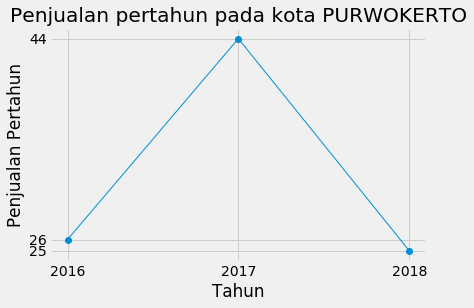

Tahun Penjualan
1  2016        26
2  2017        44
3  2018        25

In [9]:
#VISUALISASI DATA KOTA DAN JUMLAH PEMBELIAN PADA SETIAP TAHUN

kota = 'Purwokerto'
c.execute('''SELECT strftime('%Y', penjualan.tanggal_penjualan), sum(penjualan.jumlah_beli) as total
          FROM penjualan join pelanggan on pelanggan.id = penjualan.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join produk on produk.id = penjualan.produk_id
          where kota.nama_kota = "''' + str(kota) +'''"
          group by strftime('%Y', penjualan.tanggal_penjualan), kota.nama_kota
          order by date(penjualan.tanggal_penjualan) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)
    
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan Pertahun')
plt.title("Penjualan pertahun pada kota " + kota.upper())
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

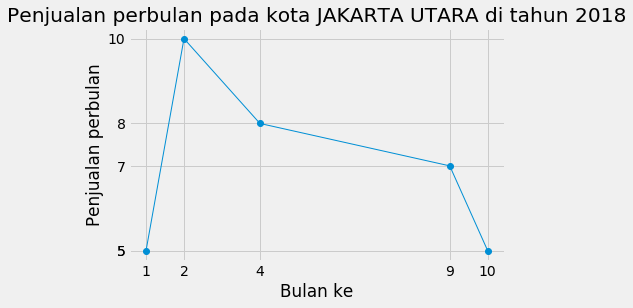

Bulan Penjualan
1    01         5
2    02        10
3    04         8
4    09         7
5    10         5

In [10]:
#VISUALISASI DATA KOTA DAN JUMLAH PEMBELIAN PADA TAHUN TERTENTU (PERBULAN)
kota = 'Jakarta Utara'
tahun = '2018'

c.execute('''SELECT strftime('%m', penjualan.tanggal_penjualan), sum(penjualan.jumlah_beli) as total
          FROM penjualan join pelanggan on pelanggan.id = penjualan.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join produk on produk.id = penjualan.produk_id
          where strftime('%Y', penjualan.tanggal_penjualan) = "''' + str(tahun) +'''"
          and kota.nama_kota = "''' + str(kota) +'''"
          group by strftime('%m', penjualan.tanggal_penjualan), kota.nama_kota
          order by strftime('%m', penjualan.tanggal_penjualan) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)


np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Bulan ke')
plt.ylabel('Penjualan perbulan')
plt.title("Penjualan perbulan pada kota " + kota.upper() + " di tahun " + tahun)
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Bulan', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

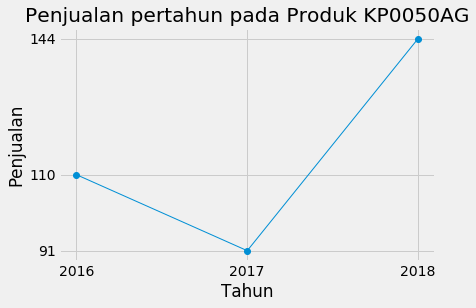

Tahun     Nama Produk Penjualan
1  2016  Aceh Gayo 50kg       110
2  2017  Aceh Gayo 50kg        91
3  2018  Aceh Gayo 50kg       144

In [11]:
#VISUALISASI DATA PRODUK DAN JUMLAH PEMBELIAN PADA SETIAP TAHUN
produk = 'KP0050AG'

c.execute('''SELECT strftime('%Y', penjualan.tanggal_penjualan), produk.nama_produk, sum(penjualan.jumlah_beli) as total
          FROM penjualan join pelanggan on pelanggan.id = penjualan.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join produk on produk.id = penjualan.produk_id
          where produk.SKU = "''' + str(produk) +'''"
          group by strftime('%Y', penjualan.tanggal_penjualan), produk.nama_produk
          order by strftime('%Y', penjualan.tanggal_penjualan) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)

    
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[2]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun pada Produk " + produk.upper())
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Nama Produk', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

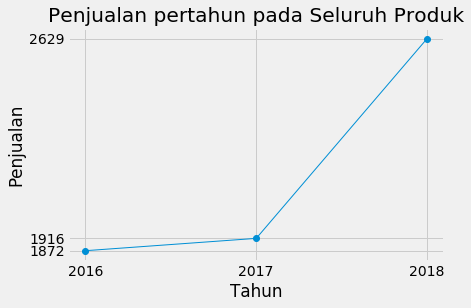

Tahun Penjualan
1  2016      1872
2  2017      1916
3  2018      2629

In [12]:
#VISUALISASI DATA PENJUALAN PADA SETIAP TAHUN

c.execute('''SELECT strftime('%Y', penjualan.tanggal_penjualan), sum(penjualan.jumlah_beli) as total
          FROM penjualan join pelanggan on pelanggan.id = penjualan.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join produk on produk.id = penjualan.produk_id
          group by strftime('%Y', penjualan.tanggal_penjualan)
          order by strftime('%Y', penjualan.tanggal_penjualan) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)

np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[1]) for x in np_tahun_kota[:,:]], [ int(x[1]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun pada Seluruh Produk")
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

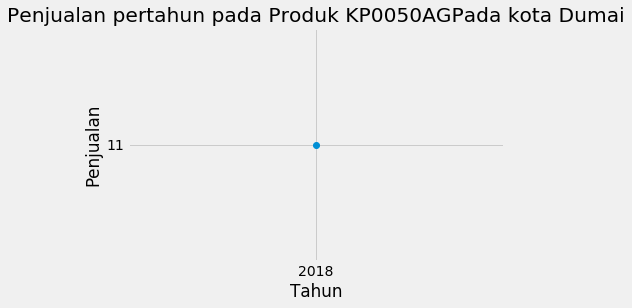

Tahun     Nama Produk Penjualan
1  2018  Aceh Gayo 50kg        11

In [13]:
#VISUALISASI DATA PRODUK DAN JUMLAH PEMBELIAN PADA SETIAP TAHUN
produk = 'KP0050AG'
kota = 'Dumai'

c.execute('''SELECT strftime('%Y', penjualan.tanggal_penjualan), produk.nama_produk, sum(penjualan.jumlah_beli) as total
          FROM penjualan join pelanggan on pelanggan.id = penjualan.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join produk on produk.id = penjualan.produk_id
          where produk.SKU = "''' + str(produk) +'''"
          and kota.nama_kota = "''' + str(kota) +'''"
          group by strftime('%Y', penjualan.tanggal_penjualan), produk.nama_produk
          order by strftime('%Y', penjualan.tanggal_penjualan) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)

    
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[2]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan pertahun pada Produk " + produk.upper() + "Pada kota " + str(kota))
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Nama Produk', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

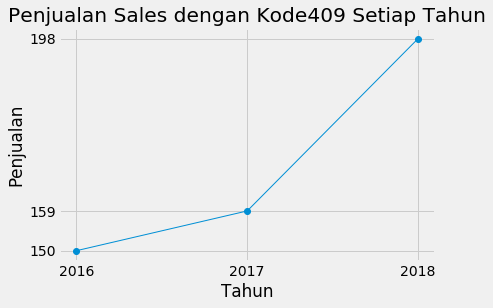

Tahun    Nama Sales Penjualan
1  2016  Husni Kawano       150
2  2017  Husni Kawano       159
3  2018  Husni Kawano       198

In [22]:
#VISUALISASI DATA SALES DAN JUMLAH PENJUALAN PADA SETIAP TAHUN
sales = '409'

c.execute('''SELECT strftime('%Y', penjualan.tanggal_penjualan), sales.nama_depan || ' ' || sales.nama_belakang as nama_sales, sum(penjualan.jumlah_beli) as total
          FROM penjualan join pelanggan on pelanggan.id = penjualan.pelanggan_id 
          join kota on kota.id = pelanggan.kota_id 
          join produk on produk.id = penjualan.produk_id
          join sales on sales.id = penjualan.sales_id
          where sales.kode_sales = "''' + str(sales) +'''"
          group by strftime('%Y', penjualan.tanggal_penjualan), sales.nama_depan
          order by strftime('%Y', penjualan.tanggal_penjualan) ASC
          ''')

tahun_kota = []
for row in c.fetchall():
    tahun_kota.append(row)

    
np_tahun_kota = np.array(tahun_kota)
plt.plot([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_tahun_kota[:,:]], [ int(x[0]) for x in np_tahun_kota[:,:]])
plt.yticks([ int(x[2]) for x in np_tahun_kota[:,:]], [ int(x[2]) for x in np_tahun_kota[:,:]])
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title("Penjualan Sales dengan Kode" + sales.upper() + " Setiap Tahun")
plt.show()

df = pd.DataFrame([ x for x in np_tahun_kota[:,:]])
df.columns = ['Tahun', 'Nama Sales', 'Penjualan']
df.index = np.arange(1,len(df)+1)
df

In [15]:
# c.close()
# conn.close()